<br>

### hw7pr2_.ipynb: Images!

This lab is about manipulating image data. Perhaps you have some experience with this from CS5. If not, don't worry! We will go through everything here...

Let's start by importing some libraries -- you _should_ have these already:
+ `numpy` (numerical python) is a library to help handle large amounts of data using objects very similar to lists  
+ `matplotlib` is python's super handy graphing library  
+ "Python Imaging Library" (Pillow/`PIL`) supports image reading and writing  
+ `copy` allows us to make deep copies of images so we can edit them without changing the original
+ `colorsys` helps us convert between RGB and HSV
+ `time` is to give your computer a break!
    
The functions below make sure that the pixels are in "canonical" image form:
- each image's rgbdata is a list... of lists (rows)
- each row is a list... of lists (pixels)
- each pixel is a list of three integers:  [r,g,b], each from 0-255 (inclusive)

Skim over the functions to see what they do, but you don't have to understand all of the details...

Run the cells below!

In [1]:
# libraries!
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import copy
import colorsys
import time

In [2]:
def getRGB(filename):
    """ reads a png or jpg file like 'flag.jpg' (a string)
        returns the pixels as a list-of-lists-of-lists
        this is accessible, but not fast: Use small images!
    """
    original = Image.open(filename)     # open the image
    print(f"Reading image from '{filename}':")
    print(f"  Format: {original.format}\n  Original Size: {original.size}\n  Mode: {original.mode}")
    max_dim = max(original.size)
    scale = max_dim/300
    new_size = tuple([round(x/scale) for x in original.size])
    print(f"WARNING:  New size is {new_size}")
    original = original.resize(new_size,Image.ANTIALIAS)
    WIDTH, HEIGHT = original.size
    px = original.load()
    PIXEL_LIST = []
    for r in range(HEIGHT):
        row = []
        for c in range(WIDTH):
            row.append( px[c,r][:3] )
        PIXEL_LIST.append( row )
    return PIXEL_LIST


In [3]:
# let's see some values!

values = getRGB("small.png")
values           # To show them all, use  print(f"values are {values}")

Reading image from 'small.png':
  Format: PNG
  Original Size: (50, 50)
  Mode: RGB


[[(41, 137, 173),
  (40, 137, 173),
  (40, 137, 173),
  (37, 137, 173),
  (36, 137, 173),
  (34, 138, 173),
  (32, 138, 174),
  (29, 139, 174),
  (28, 139, 175),
  (26, 139, 176),
  (26, 140, 176),
  (26, 139, 179),
  (27, 140, 180),
  (27, 140, 181),
  (28, 141, 182),
  (28, 141, 182),
  (28, 142, 183),
  (28, 142, 184),
  (28, 141, 183),
  (27, 143, 184),
  (27, 143, 184),
  (27, 143, 184),
  (27, 144, 185),
  (27, 144, 186),
  (27, 145, 187),
  (27, 147, 188),
  (27, 147, 189),
  (27, 149, 191),
  (27, 150, 193),
  (27, 151, 195),
  (28, 153, 197),
  (28, 154, 199),
  (28, 155, 199),
  (28, 155, 200),
  (28, 155, 201),
  (28, 156, 201),
  (29, 155, 201),
  (29, 155, 201),
  (29, 155, 200),
  (29, 155, 200),
  (29, 155, 201),
  (30, 156, 201),
  (30, 156, 201),
  (30, 156, 201),
  (30, 157, 202),
  (30, 157, 202),
  (30, 157, 203),
  (30, 157, 204),
  (30, 157, 205),
  (30, 157, 205),
  (30, 157, 205),
  (30, 157, 205),
  (30, 156, 204),
  (30, 156, 203),
  (30, 156, 202),
  (31, 155

In [4]:
def set_size(width, height, ax=None):
    """Sets the size of an image when printing in the notebook
       w, h: width, height in inches 
    """
    w = width; h = height
    if not ax: 
        ax=plt.gca()  # gets current axes
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

In [5]:
# wrapper for matplotlib's show function
def show_image( rgbdata, hgt_in=5.42, wid_in=5.42 ):
    """ shows an image whose pixels are in rgbdata 
        note:  rgbdata is a list-of-rows-of-pixels-of-rgb values, _not_ a filename!
            use getRGB() to get this data!
        hgt_in is the desired height (in inches)
        wid_in is the desired width (in inches)
            use set_size() with these parameters
        _but_ the library will not change the aspect ratio (takes the smaller)
        by default, the hgt_in and wid_in are 5.42 in.
        (and feel free to change these!)
    """
    fig, ax = plt.subplots()               # obtains the figure and axes objects
    im = ax.imshow(rgbdata)                # this is matplotlib's call to show an image 
    #set_size(width=wid_in, height=hgt_in)  # matplotlib will maintain the image's aspect ratio
    ax.axis('off')                         # turns off the axes (in units of pixels)
    plt.show()                             # show the image

## Our first image

Try it out below:

First we call `rgbdata = getRGB(filename)` to get the pixel data as a list-of-lists-of-lists

Then we use the `show_image(rgbdata)` function to print the image in the notebook!

In case you didn't know, jupyter notebooks have built in "magic functions" that are very useful!

Most magic functions start with a `%` symbol

Similar to a terminal, you can use `%pwd` to see your current directory (wherever this notebook is located) and `%ls` to see all of the files in your current directory

In [6]:
cdir = %pwd
print(f"Here are all of the files in {cdir}\n")
%ls

Here are all of the files in /Users/rachelyang/Downloads/week7_spr22

avengers.jpg                      illusion.png*
coffee.jpg                        messi5.jpg*
disney.jpg                        monalisa.jpg*
flag.jpg*                         new_flag_image_with_message.png
flag.png                          new_image.png
flag_saying_hi.png                opencv_open_image.py
flag_with_coffee_article.png      original_and_green.png*
greened.jpg                       pitzer_grounds.jpg*
hw7ec.ipynb                       randj.txt*
hw7pr0.ipynb                      small.png*
hw7pr1_and_hw6pr4_NOTcolab.ipynb  smallFlag.jpg
hw7pr1_and_hw6pr4_colab.ipynb     small_flag.png*
hw7pr2imagefilters.ipynb          spam.jpg
hw7pr3steg.ipynb                  spam.png*
hw8pr3_project_progress.ipynb


Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB


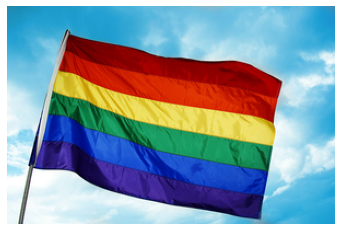

In [7]:
filename = "flag.png"   # pick an image from the list above!
rgbdata = getRGB(filename)
show_image(rgbdata)

## Manipulating RGB Data

Let's look at the "bits" of our images... first pixels (then bits themselves!)

Let's show the individual channels (r, g, and b)

For a given image, we can create three new images:
- Red values only: [42, 42, 42] becomes [42, 0, 0]
- Green values only: [42, 42, 42] becomes [0, 42, 0]
- Blue values only: [42, 42, 42] becomes [0, 0, 42]

In [8]:
def oneColor(pixel, color):
    """Changes a pixel to only have one color value
       makes other values 0"""
    
    if color == "red":
        r = pixel[0]
        pixel = [r,0,0]
        
    elif color == "green":
        g = pixel[1]
        pixel = [0,g,0]
        
    elif color == "blue":
        b = pixel[2]
        pixel = [0,0,b]
        
    else:
        print(f"didn't recognize color of {color}")
        
    return pixel

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

Running...

The original pixel in the top left corner is [ 48 132 164]
The red-only pixel in the top left corner is [48  0  0]
The green-only pixel in the top left corner is [  0 132   0]
The blue-only pixel in the top left corner is [  0   0 164]


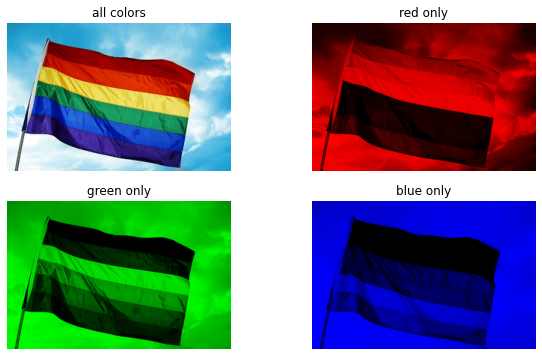

In [9]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array

print("\nRunning...\n")
image_r = np.apply_along_axis(oneColor, 2, rgbdata, "red")   # this applies the function oneColor to each pixel
image_g = np.apply_along_axis(oneColor, 2, rgbdata, "green") # this applies the function oneColor to each pixel
image_b = np.apply_along_axis(oneColor, 2, rgbdata, "blue")  # this applies the function oneColor to each pixel

print(f"The original pixel in the top left corner is {rgbdata[0][0]}")
print(f"The red-only pixel in the top left corner is {image_r[0][0]}")
print(f"The green-only pixel in the top left corner is {image_g[0][0]}")
print(f"The blue-only pixel in the top left corner is {image_b[0][0]}")

# let's show off how to create multiple images in one figure

fig, ax = plt.subplots(2,2, figsize=(10,6))   # this means ax will be a 2x2 numpy array of axes!

ax[0,0].imshow(rgbdata)  # very similar to show_image() function
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_r)  # need this so as not to use a color-colormap!
ax[0,1].axis('off')   
ax[0,1].set_title('red only')

ax[1,0].imshow(image_g, cmap='gray')
ax[1,0].axis('off')   
ax[1,0].set_title('green only')

ax[1,1].imshow(image_b, cmap='gray')
ax[1,1].axis('off')  
ax[1,1].set_title('blue only')

plt.show()

In [10]:
#
# extra challenge:  "see" the colors in grayscale...
#

def grayscaleColor(pixel, color):
    """Changes a pixel to only have one color value
       makes other values 0"""
    
    if color == "red":
        r = pixel[0]
        pixel = [r,r,r]
        
    elif color == "green":
        g = pixel[1]
        pixel = [g,g,g]
        
    elif color == "blue":
        b = pixel[2]
        pixel = [b,b,b]
        
    else:
        print(f"didn't recognize color of {color}")
        
    return pixel

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

Running...

The original pixel in the top left corner is [ 48 132 164]
The red-only pixel in the top left corner is [48 48 48]
The green-only pixel in the top left corner is [132 132 132]
The blue-only pixel in the top left corner is [164 164 164]


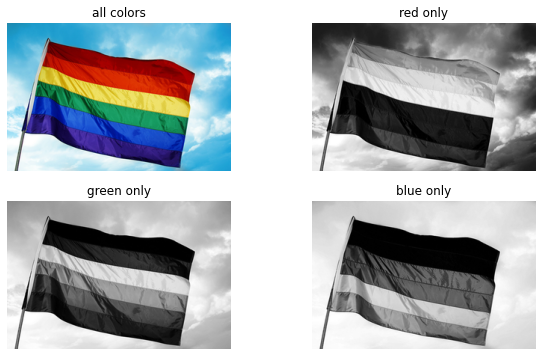

In [11]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array

print("\nRunning...\n")
image_r = np.apply_along_axis(grayscaleColor, 2, rgbdata, "red")
image_g = np.apply_along_axis(grayscaleColor, 2, rgbdata, "green")
image_b = np.apply_along_axis(grayscaleColor, 2, rgbdata, "blue")

print(f"The original pixel in the top left corner is {rgbdata[0][0]}")
print(f"The red-only pixel in the top left corner is {image_r[0][0]}")
print(f"The green-only pixel in the top left corner is {image_g[0][0]}")
print(f"The blue-only pixel in the top left corner is {image_b[0][0]}")

# let's show off how to create multiple images in one figure

fig, ax = plt.subplots(2,2, figsize=(10,6))   # this means ax will be a 2x2 numpy array of axes!

ax[0,0].imshow(rgbdata)  # very similar to show_image() function
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_r)  # need this so as not to use a color-colormap!
ax[0,1].axis('off')   
ax[0,1].set_title('red only')

ax[1,0].imshow(image_g, cmap='gray')
ax[1,0].axis('off')   
ax[1,0].set_title('green only')

ax[1,1].imshow(image_b, cmap='gray')
ax[1,1].axis('off')  
ax[1,1].set_title('blue only')

plt.show()

## Manipulating HSV Data

Next let's introduce HSV (hue, saturation, value) "perceptual color space" (i.e., better aligned to human perception)

Note: HSV is a change-of-color-representation, _not_ a change of image content!!!

Here is a nice illustration: https://programmingdesignsystems.com/color/color-models-and-color-spaces/index.html

Below we have provided some functions to convert between RGB and HSV pixels (using the `colorsys` library)

In [12]:
def rgb2hsv(rgb):
    """Converts an RGB pixel (r/g/b: 0-255)
    to an HSV pixel (h: 0-360, s/v: 0-100)"""
    R, G, B = rgb[0]/255, rgb[1]/255, rgb[2]/255
    hsv = colorsys.rgb_to_hsv(R,G,B)
    return [round(hsv[0]*360, 2), round(hsv[1]*100, 2), round(hsv[2]*100, 2)]

In [13]:
rgb = [10, 20, 50]
print(f"RGB pixel is {rgb}")
print(f"HSV pixel is {rgb2hsv(rgb)}")

RGB pixel is [10, 20, 50]
HSV pixel is [225.0, 80.0, 19.61]


In [14]:
def hsv2rgb(hsv):
    """Converts an HSV pixel (h: 0-360, s/v: 0-100)
    to an RGB pixel (r/g/b: 0-255)"""
    H, S, V = hsv[0]/360, hsv[1]/100, hsv[2]/100
    return list(round(i * 255) for i in colorsys.hsv_to_rgb(H,S,V))

In [15]:
hsv = [225, 80, 19.61]
print(f"HSV pixel is {hsv}")
print(f"RGB pixel is {hsv2rgb(hsv)}")

HSV pixel is [225, 80, 19.61]
RGB pixel is [10, 20, 50]


<br>

We have also provided a function (`oneAttribute()`) to modify HSV data! 

For each RGB value, we made each "other" value into 0.

Making a value 0 for HSV pixels is unlikely produce an image, 
so instead the function simple halves the value for a given attribute
- [360, 100, 100] --> [180, 100, 100]

In [16]:
def oneAttribute(pixel, att):
    """Changes a pixel by halving an HSV attribute
       leaves other values alone"""
    
    if att == "hue":
        h, s, v = pixel
        pixel = [h/2, s, v]
        
    elif att == "saturation":
        h, s, v = pixel
        pixel = [h, s/2, v]
        
    elif att == "value":
        h, s, v = pixel
        pixel = [h, s, v/2]
        
    return pixel

### NOTE

Converting back and forth between RGB and HSV will likely take at least a few seconds, so we have separated the calculation and graphing cells...

In [17]:
filename = "flag.png"   # pick an image!
rgbdata = np.asarray(getRGB(filename))   # turn list-list-list data into a numpy array
print("\n..........")
hsvdata = np.apply_along_axis(rgb2hsv, 2, rgbdata)   # convert to hsv
print("Data converted to HSV format")
print("..........")

# modify hsv data by halving an attribute
image_h = np.apply_along_axis(oneAttribute, 2, hsvdata, "hue")
image_s = np.apply_along_axis(oneAttribute, 2, hsvdata, "value")
image_v = np.apply_along_axis(oneAttribute, 2, hsvdata, "saturation")
print("Attributes cut in half")
print("..........")

# convert back to rgb for matplotlib to display
image_h = np.apply_along_axis(hsv2rgb, 2, image_h).astype(int)
image_s = np.apply_along_axis(hsv2rgb, 2, image_s).astype(int)
image_v = np.apply_along_axis(hsv2rgb, 2, image_v).astype(int)
print("DONE")

Reading image from 'flag.png':
  Format: PNG
  Original Size: (625, 415)
  Mode: RGB

..........
Data converted to HSV format
..........
Attributes cut in half
..........
DONE


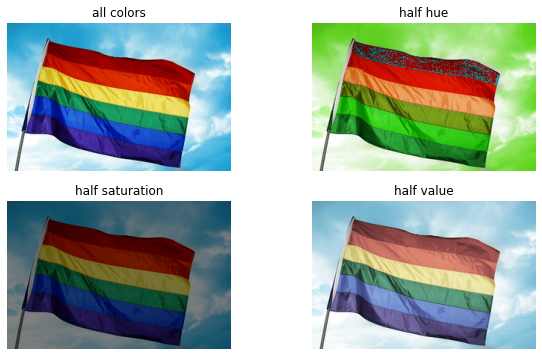

In [18]:
fig, ax = plt.subplots(2,2, figsize=(10,6))

ax[0,0].imshow(rgbdata)
ax[0,0].axis('off')  
ax[0,0].set_title('all colors') 

ax[0,1].imshow(image_h)
ax[0,1].axis('off')   
ax[0,1].set_title('half hue')

ax[1,0].imshow(image_s)
ax[1,0].axis('off')   
ax[1,0].set_title('half saturation')

ax[1,1].imshow(image_v)
ax[1,1].axis('off')  
ax[1,1].set_title('half value')

plt.show()

# Image Filters

Below are some filters! Run them and see how they work

- `max_green()` maximizes (255) the green value of a pixel _**if**_ the original value contains a "1"
- `binary_green()` converts the base-10 green value of a pixel to an 8-bit binary string (42 --> "00101010"), changes the first and last bit to a "1" ("00101010 --> "10101011"), and then converts back to base-10 ("10101011" --> 171)
- `hsv_green()` converts an image to HSV and maximizes the green value of a pixel _**if**_ the h value is between 120 and 240 (degrees) 

The examples we ran previously (for example, only showing the blue value in a pixel) are all examples of filters too!

In [19]:
def max_green_w1( image_rgb ):
    """ an example of a pixel-by-pixel filter 
            this one sets to "max green" any pixel with a '1' (a one digit) in its (decimal) green value
            [42, 42, 42]  --> [42, 42, 42]
            [42, 142, 42] --> [42,255,42]
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = copy.deepcopy(image_rgb)   # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            green_as_str = str(g)
            if '1' in green_as_str:   # not in photoshop! :-) 
                image_new[row][col] = [r,255,b]
            else:
                image_new[row][col] = [r,g,b]     
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


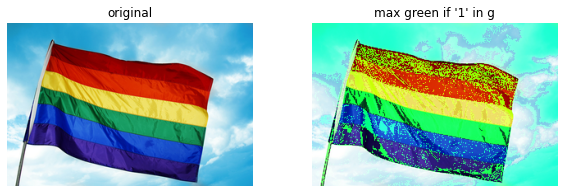

In [20]:
image_rgb = getRGB("flag.jpg")
image_new = max_green_w1(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title("max green if '1' in g")

plt.show()

In [21]:
def binary_green( image_rgb ):
    """ an example of a pixel-by-pixel filter:  
            this one sets the "bottom two bits" of each green value to zeros, e.g.,
            old green value:   '00101010'   # always 8 bits...
            new green value:   '10101011'   # always 8 bits, starting and ending with a 1
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = copy.deepcopy(image_rgb)         # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            # remember:  we can do anything with the pixel data... here, let's convert to binary
            
            green_in_binary = bin(g)[2:]
            nbits = len(green_in_binary)    # to make sure we have 8 bits...
            green_in_binary = '0'*(8-nbits) + green_in_binary
            green_in_binary = '1' + green_in_binary[1:-1] + '1'
            
            new_g = int(green_in_binary, 2)  # convert back to base 10 (did you know that int() could do that?)
            
            image_new[row][col] = r, new_g, b
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


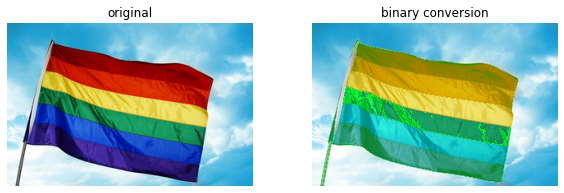

In [22]:
image_rgb = getRGB("flag.jpg") 
image_new = binary_green(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('binary conversion')

plt.show()

In [23]:
def hsv_green( image_rgb ):
    """ an example of a pixel-by-pixel filter that uses hsv (to detect green!)
        NOTE: the input and output are still rgb!!!
        We're simply _using_ the hsv representation in a meaningful way...
        
        input: an r, g, b image
        output: a transformed r, g, b image
    """
    image_new = np.asarray(image_rgb)
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    image_hsv = np.apply_along_axis(rgb2hsv, 2, image_new)      # convert to hsv
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            h, s, v = image_hsv[row][col]   # the "old" pixel's hsv
            
            if 40<h<60:  # let's call this "green"
                image_new[row][col] = [0,255,0]  # maximize its greenness
            else:
                pass  # don't change the original pixel otherwise...   
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


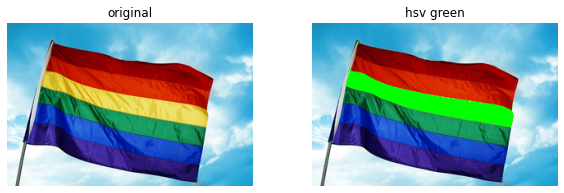

In [24]:
image_rgb = getRGB("flag.jpg") 
image_new = hsv_green(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('hsv green')

plt.show()

<br>

# Problem #1:  

Your task is to write your own one-image-filters:
- one involving rgb
- one involving hsv

In [46]:
def new_rgb_filter( image_file ):
    """ better docstring needed! Explain your filter! 
        We like to call it the LSD filter (not that we do LSD). 
        There is a video game called LSD: Dream Emulator, and in this dream the images are mainly purple and blue. 
        We wanted to emulate this in our photos. 
    """
    
    image_new = copy.deepcopy(image_rgb)         # start with a copy of the original...
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            
            # Write something HERE
            image_new[row][col] = abs(150-r), abs(90-g), abs(90-b)

    return image_new

new_rgb_filter("flag.jpg")

[[(102, 42, 74),
  (106, 45, 77),
  (109, 45, 78),
  (110, 45, 80),
  (113, 45, 80),
  (117, 47, 83),
  (118, 46, 86),
  (119, 47, 85),
  (121, 47, 84),
  (121, 47, 85),
  (121, 47, 84),
  (122, 47, 84),
  (122, 48, 86),
  (122, 48, 87),
  (121, 48, 88),
  (122, 49, 87),
  (122, 49, 87),
  (121, 50, 90),
  (122, 52, 92),
  (122, 52, 92),
  (122, 53, 94),
  (122, 56, 96),
  (121, 57, 99),
  (121, 58, 101),
  (120, 58, 102),
  (121, 58, 101),
  (121, 58, 101),
  (120, 59, 101),
  (122, 59, 100),
  (122, 58, 100),
  (122, 60, 103),
  (121, 62, 105),
  (121, 62, 106),
  (122, 63, 109),
  (122, 65, 111),
  (122, 64, 109),
  (123, 63, 107),
  (123, 64, 106),
  (123, 63, 107),
  (122, 64, 109),
  (121, 66, 110),
  (121, 66, 112),
  (121, 65, 112),
  (121, 65, 111),
  (122, 65, 111),
  (121, 66, 113),
  (121, 65, 110),
  (120, 64, 110),
  (121, 65, 112),
  (121, 66, 110),
  (120, 67, 112),
  (120, 66, 113),
  (120, 65, 111),
  (119, 65, 110),
  (119, 65, 109),
  (118, 64, 108),
  (119, 63, 106

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


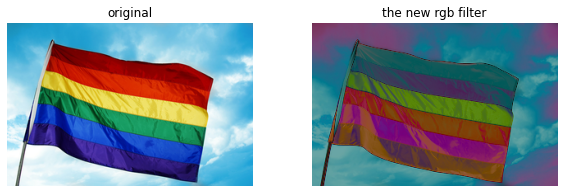

In [47]:
image_rgb = getRGB("flag.jpg") 
image_new = new_rgb_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('the new rgb filter')

plt.show()

Reading image from 'cs181_lsd.jpg':
  Format: WEBP
  Original Size: (1815, 1022)
  Mode: RGB


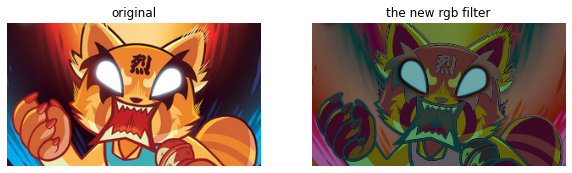

In [49]:
# we use in an image of aggretsuko, one of our favorite anime characters
image_rgb = getRGB("cs181_lsd.jpg") 
image_new = new_rgb_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('the new rgb filter')

plt.show()

In [66]:
def new_hsv_filter( image_file ):
    """ better docstring needed! Explain your filter! 
        We wanted to beautify pictures (change them into colors that we deemed pretty - pink, light blue, turqoise, lavander)
        Here are our results! 
    """
    
    image_new = np.asarray(image_rgb)
    num_rows = len(image_new) 
    num_cols = len(image_new[0]) 
    image_hsv = np.apply_along_axis(rgb2hsv, 2, image_new)   # convert to hsv
    
    for row in range(num_rows):             # loop over each row
        for col in range(num_cols):         # loop over each column
            r, g, b = image_rgb[row][col]   # the "old" pixel's rgb
            h, s, v = image_hsv[row][col]   # the "old" pixel's hsv
            
            # Write something HERE
            
            if 0<h<50:
                image_new[row][col] = 255,192,203
            if 50<h<90:
                image_new[row][col] = 230,230,250
            if 100<h<168:
                image_new[row][col] = 135,206,250
            if 190<h<247:
                image_new[row][col] = 176,224,230
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB


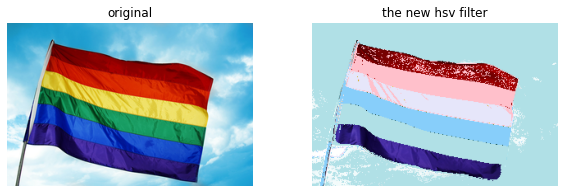

In [67]:
image_rgb = getRGB("flag.jpg") 
image_new = new_hsv_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('the new hsv filter')

plt.show()

Reading image from 'cs181_beautify.jpeg':
  Format: JPEG
  Original Size: (400, 276)
  Mode: RGB


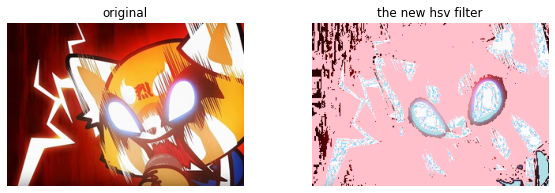

In [68]:
image_rgb = getRGB("cs181_beautify.jpeg") 
image_new = new_hsv_filter(image_rgb)

fig, ax = plt.subplots(1,2, figsize=(10,3)) 

ax[0].imshow(image_rgb)
ax[0].axis('off')   
ax[0].set_title('original')

ax[1].imshow(image_new)
ax[1].axis('off')   
ax[1].set_title('the new hsv filter')

plt.show()

## More Filters!

It is time for two-image filters!

The goal is to create an output that depends -- in a visible way -- on the pixels of both input images -- first, two examples!

- `two_image_min()` combines both pictures by taking the minimum value between pixels. For example, if image-1 has pixel [10, 100, 130] and image-2 has pixel [42, 42, 20] in the same location, the new image will have pixel [10, 42, 20] in that location

- `time_image_overlap()` is more straightforward. It takes image-2 and puts it on top of image-1 at coordinates (where the top left corner is the origin) you can specify

In [69]:
def two_image_min( image_rgb1, image_rgb2 ):
    """ an example of a two-image pixel-by-pixel filter
            this takes the componentwise min! hmmm...
        input: two r, g, b images
        output: a transformed r, g, b image (the "min image")
    """
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    # create a blank image
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 
    # uint8 means unsigned 8-bit integer (0-255) 
    
    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb

            r = min(r1, r2)
            g = min(g1, g2)
            b = min(b1, b2)
            
            image_new[row][col] = [r,g,b]
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


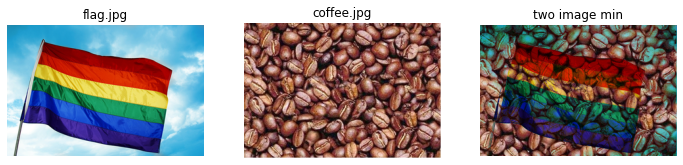

In [70]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = two_image_min(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two image min')

plt.show()

In [71]:
def two_image_overlap( image_rgb1, image_rgb2, ulx, uly ):
    """ an example of a two-image pixel-by-pixel filter
            puts im2 on top of im1 at upper-left-x (ulx) (col) and upper-left-y (uly) (row)
            the resulting size is image_rgb1 (the rest of image_rgb2 is dropped...)
        input: two r, g, b images
        output: a transformed r, g, b image (the "overlap image")
    """    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    image_new = copy.deepcopy(image_rgb1)  # not symmetric! image_rgb1 is the "background"
    
    max_row = min(num_rows1,uly+num_rows2) # no more than num_rows1
    max_col = min(num_cols1,ulx+num_cols2) # no more than num_cols1 
    
    for row in range(uly,max_row):
        for col in range(ulx,max_col):
            image_new[row][col] = image_rgb2[row-uly][col-ulx]  # put 2nd image over 1st
            
    return image_new

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


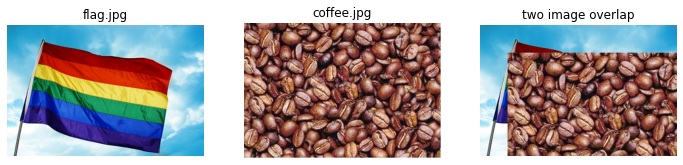

In [72]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = two_image_overlap(image_rgb1,image_rgb2,42,42)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('two image overlap')

plt.show()

# Problem #2:  

Your next task is to write your own two-image-filters:
- one involving rgb
- one involving hsv

In [75]:
import random
def new_rgb_filter_two( image_rgb1, image_rgb2 ):
    """ better docstring needed! Explain your two-image filter...
        We used a random number generator and left it to fate. 
        Depending on the number, we chose from which picture the r, g, b value would come from 
    """
    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    # create a blank image
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 
    # uint8 means unsigned 8-bit integer (0-255) 
    
    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb

            rand_num = random.randint(0,1)
            if rand_num < 0.5:
                r = r1
                g = g2
                b = b1
            else:
                r = r2
                g = g1
                b = b2

            image_new[row][col] = [r,g,b]
            
    return image_new


Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


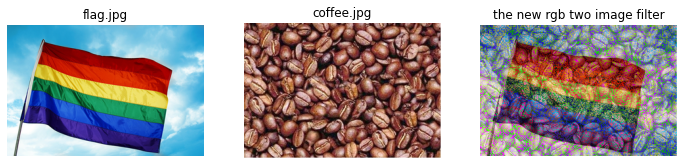

In [76]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_rgb_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('the new rgb two image filter')

plt.show()

Reading image from 'cs181_lsd.jpg':
  Format: WEBP
  Original Size: (1815, 1022)
  Mode: RGB
Reading image from 'cs181_kirby.jpeg':
  Format: WEBP
  Original Size: (960, 480)
  Mode: RGB


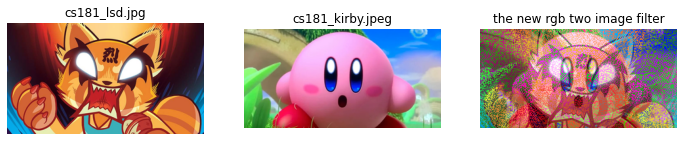

In [78]:
# Here, we use Kirby (Rachel's favorite character) and Aggretsuko (Liz's favorite character) 

file1 = "cs181_lsd.jpg"    # feel free to change these!
file2 = "cs181_kirby.jpeg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_rgb_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('the new rgb two image filter')

plt.show()

In [82]:
def new_hsv_filter_two( image_rgb1, image_rgb2 ):
    """ better docstring needed! Explain your two-image filter...
        Demonic filter (our name for it). The opposite of beautify. 
        Depending on the hue, we decided which hue from which picture we would like to use
    """
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    num_rows = min(num_rows1,num_rows2)
    num_cols = min(num_cols1,num_cols2)
    
    image_hsv1 = np.apply_along_axis(rgb2hsv, 2, image_rgb1)   # convert to hsv
    image_hsv2 = np.apply_along_axis(rgb2hsv, 2, image_rgb2)   # convert to hsv
    
    # create a blank image
    image_new = np.zeros((num_rows,num_cols,3), np.uint8) 
    # uint8 means unsigned 8-bit integer (0-255) 
    
    for row in range(num_rows):  # loop over each row
        for col in range(num_cols):  # loop over each column
            r1, g1, b1 = image_rgb1[row][col]   # the "old" pixel1's rgb
            r2, g2, b2 = image_rgb2[row][col]   # the "old" pixel2's rgb
            h1, s1, v1 = image_hsv1[row][col]   # the "old" pixel's hsv
            h2, s2, v2 = image_hsv2[row][col]   # the "old" pixel's hsv
            
            if 0<h1<180:
                h2, s2, v2 = h1, s1, v1
                image_new[row][col] = h2, s2, v2
            else:
                h1, s1, v1 = h2, s2, v2 
                image_new[row][col] = h1, s2, v1
                
    
    return image_new # again, need to combine the pixels!!

Reading image from 'flag.jpg':
  Format: JPEG
  Original Size: (625, 415)
  Mode: RGB
Reading image from 'coffee.jpg':
  Format: JPEG
  Original Size: (499, 343)
  Mode: RGB


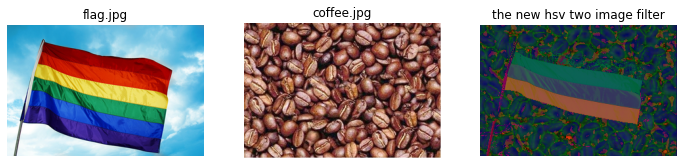

In [83]:
file1 = "flag.jpg"    # feel free to change these!
file2 = "coffee.jpg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_hsv_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('the new hsv two image filter')

plt.show()

Reading image from 'cs181_lsd.jpg':
  Format: WEBP
  Original Size: (1815, 1022)
  Mode: RGB
Reading image from 'cs181_kirby.jpeg':
  Format: WEBP
  Original Size: (960, 480)
  Mode: RGB


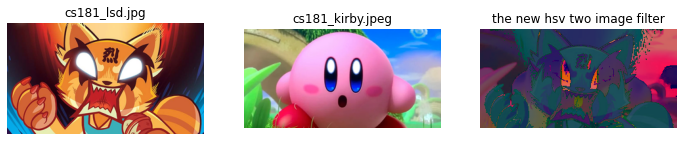

In [84]:
file1 = "cs181_lsd.jpg"    # feel free to change these!
file2 = "cs181_kirby.jpeg"

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2) 
image_new = new_hsv_filter_two(image_rgb1,image_rgb2)

fig, ax = plt.subplots(1,3, figsize=(12, 3))

ax[0].imshow(image_rgb1)
ax[0].axis('off')   
ax[0].set_title(f"{file1}")

ax[1].imshow(image_rgb2)
ax[1].axis('off')   
ax[1].set_title(f"{file2}")

ax[2].imshow(image_new)
ax[2].axis('off')   
ax[2].set_title('the new hsv two image filter')

plt.show()

# That's it!

Below is a starter for the extra-credit problem...
It could also become a project!

_Before_ trying the extra-credit, I'd encourage project-strategizing ;-)

# Greenscreen (EC)

Combine the `hsv_green()` and `two_image_overlap()` functions to do greenscreen things!

Use the cell below to resize images! It will create a new compressed image whose name you should decide

In [ ]:
# +++ OPTIONAL +++
# resize images to fit on another image
# Fill these out!
resizeMe = "flag.jpg"
resizedImage = "smallFlag.jpg"
newSize = (255,143)

# These commands will do everything - just fill out the variables above!
a = Image.open(resizeMe)
print(f"Original image is {a.size}")
a = a.resize(newSize,Image.ANTIALIAS)
a.save(resizedImage,optimize=True, quality=95)
print(f"New image is {a.size}")

In [ ]:
def saveRGB( PX, filename ):
    """ saves a list-of-lists-of-lists of rgb pixels (PX) where
        len(PX) == the # of rows
        len(PX[0]) == the # of columns
        len(PX[0][0]) should be 3 (rgb)
    """
    boxed_pixels = PX
    print( 'Starting to save', filename, '...' )
    H = len(PX)
    W = len(PX[0])
    im = Image.new("RGB", (W, H), "black")
    px = im.load()
    for r in range(H):
        for c in range(W):
            bp = boxed_pixels[r][c]
            t = tuple(bp)
            px[c,r] = t
    im.save( filename )
    time.sleep(0.42)   # give the filesystem some time...
    print( filename, "saved." )    

In [ ]:
def greenscreen( image_rgb1, image_rgb2, ulx, uly ):
    """ an example of a two-image pixel-by-pixel filter
            puts image_rgb2 on top of image_rgb1 at upper-left-x (ulx) (col) and upper-left-y (uly) (row)
            the resulting size is image_rgb1 (the rest of image_rgb2 is dropped...)
        input: two r, g, b images
        output: a transformed r, g, b image (the "overlap image")
    """    
    
    image_new = np.asarray(image_rgb1)   # image 1
    image_over = np.asarray(image_rgb2)   # image 2
    image_hsv = np.apply_along_axis(rgb2hsv, 2, image_over)   # image 2 hsv
    
    num_rows1 = len(image_rgb1) 
    num_cols1 = len(image_rgb1[0]) 
    
    num_rows2 = len(image_rgb2) 
    num_cols2 = len(image_rgb2[0]) 
    
    # image_new = copy.deepcopy(image_rgb1)  # not symmetric! image_rgb1 is the "background"
    
    max_row = min(num_rows1,uly+num_rows2) # no more than num_rows1
    max_col = min(num_cols1,ulx+num_cols2) # no more than num_cols1 
    
    for row in range(uly,max_row):
        for col in range(ulx,max_col):
            r, g, b = image_over[row-uly][col-ulx]   # image 2 rgb
            h, s, v = image_hsv[row-uly][col-ulx]    # image 2 hsv
            # image_new[row][col] = image_rgb2[row-uly][col-ulx]  # put 2nd image over 1st
            
            if h<110 or h>130:   # Warning:  this is 
                image_new[row][col] = [r,g,b]  # use image 1 rgb
            
    return image_new

In [ ]:
# choose the two images and a name for the new image you will create
file1 = "flag.jpg"   # background image
file2 = "coffee.jpg"   # image with the green screen
newFile = "greened.jpg"   # combined image (newly created)

image_rgb1 = getRGB(file1) 
image_rgb2 = getRGB(file2)
image_new = greenscreen(image_rgb1,image_rgb2,235,42)
show_image(image_new, hgt_in=7, wid_in=7 )
saveRGB(image_new, newFile)